Dataframe loaded. Shape (365, 5). Columns: Index(['date', 'Temperature, C', 'Humidity, %', 'Wind speed, m/s',
       'Pressure, mm Hg'],
      dtype='object')


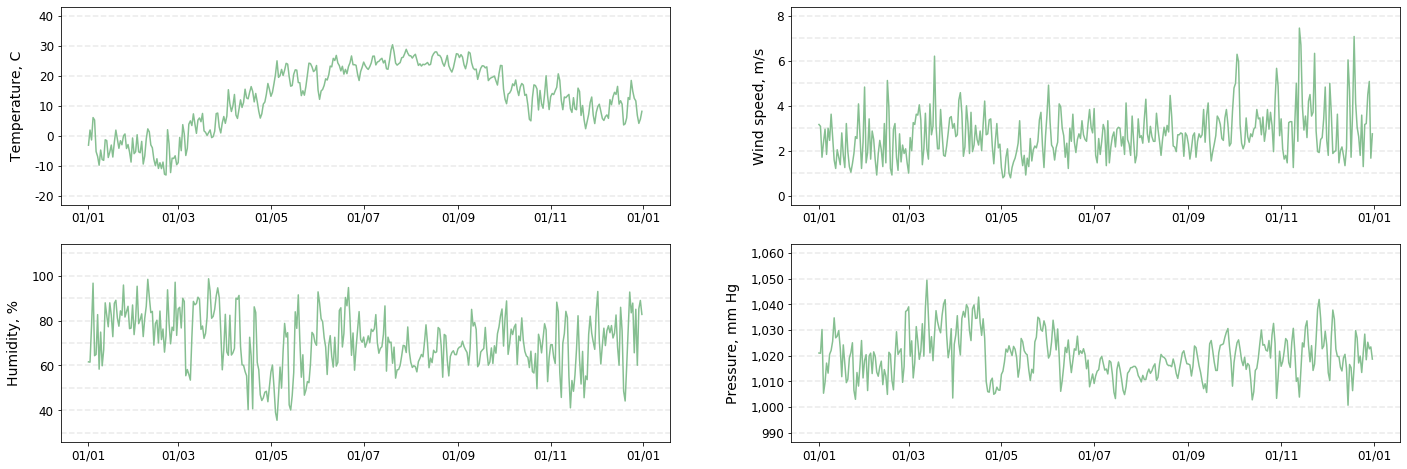

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from pandas.api.types import CategoricalDtype

Dataframe loaded. Shape (365, 5). Columns: Index(['date', 'Temperature, C', 'Humidity, %', 'Wind speed, m/s',
       'Pressure, mm Hg'],
      dtype='object')


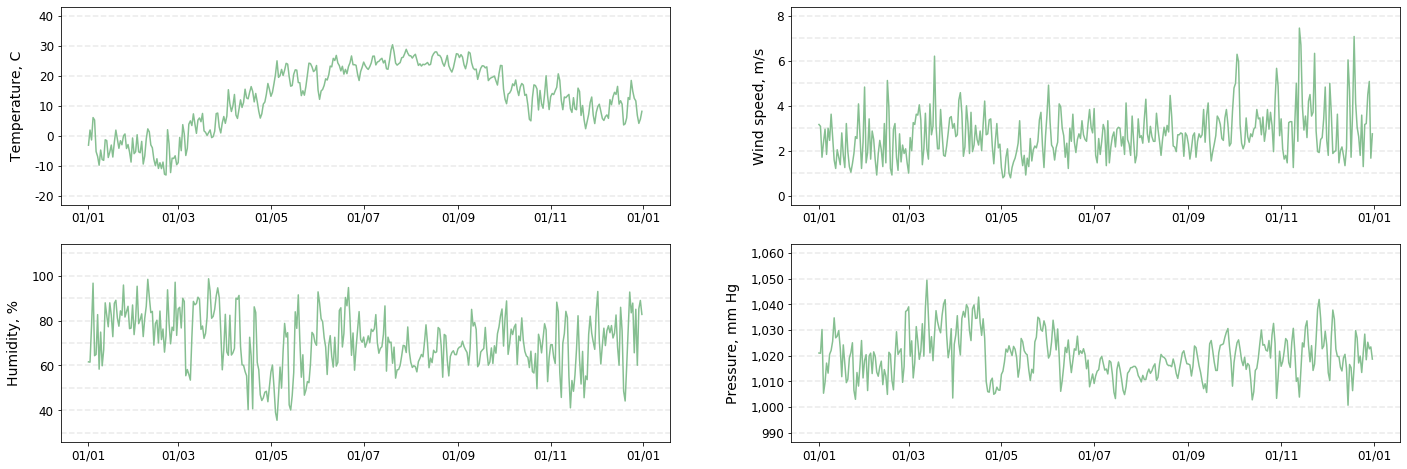

In [4]:
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


Dataframe loaded. Shape (365, 5). Columns: Index(['date', 'Temperature, C', 'Humidity, %', 'Wind speed, m/s',
       'Pressure, mm Hg'],
      dtype='object')


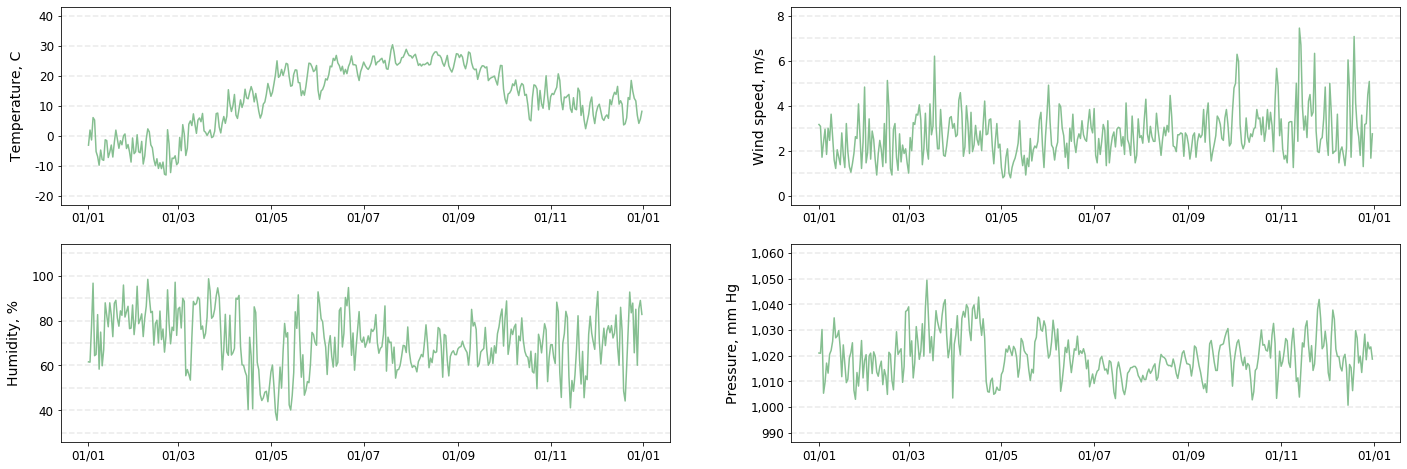

In [5]:
PIC_DIR = '/home/olga/Documents/BDT/results/pics2'
RESULT_DIR = '/home/olga/Documents/BDT/results/nyc_results/'
YEAR = 2015
PIC_SCALE = 10**3
from bdt.plot_utils import *


Dataframe loaded. Shape (365, 5). Columns: Index(['date', 'Temperature, C', 'Humidity, %', 'Wind speed, m/s',
       'Pressure, mm Hg'],
      dtype='object')


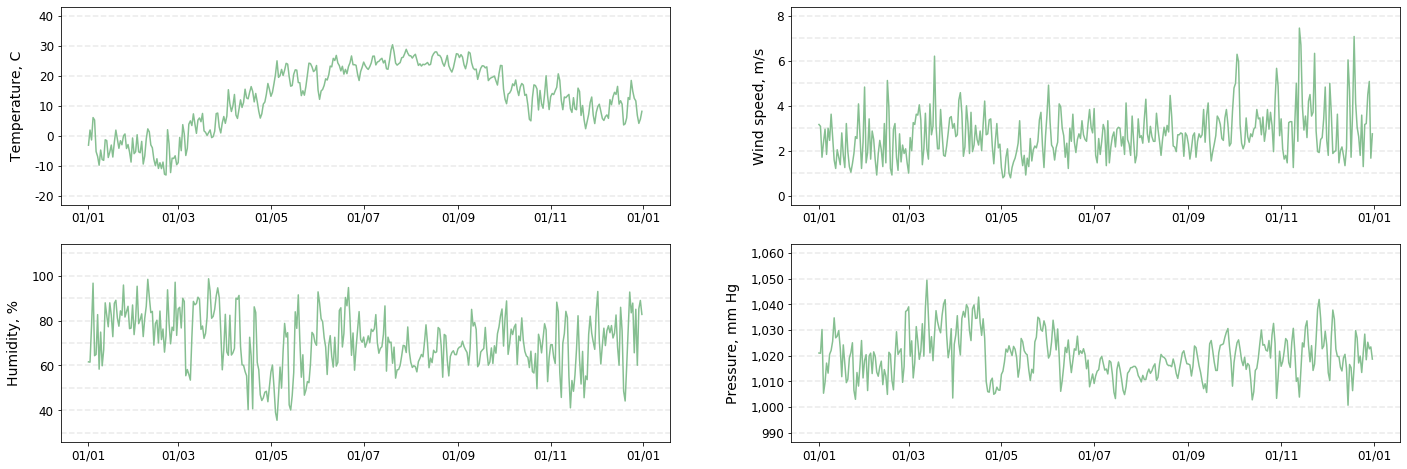

In [6]:
# Daily data on trip counts, total distance travelled,
# and amount of transferred passengers
#
dir = RESULT_DIR + 'trip_daily_sums'
columns = ['day_of_year', 'trip_count', 'passenger_count', 'total_distance']
nycDF = read_df(dir, columns, columns[0])
nycDF['date'] = pd.to_datetime(nycDF['day_of_year'], format='%j')
nycDF.set_index(['date'], inplace=True)
print(nycDF.head(5))
# convert distance from meters to km, 
# scale everything down 
nycDF['total_distance'] = nycDF['total_distance'] // 1000*PIC_SCALE
nycDF['passenger_count'] = nycDF['passenger_count'] // PIC_SCALE
nycDF['trip_count'] = nycDF['trip_count'] // PIC_SCALE

plot_column(nycDF, 'trip_count', 'Trips, $10^3$', 'Trip counts. New York 2015')
plot_column(nycDF, 'total_distance', 'Distance travelled, km $10^3$', 'Total distance travelled. New York 2015')
plot_column(nycDF, 'passenger_count', 'Passengers, $10^3$','Number of transferred passengers. New York 2015')

Dataframe loaded. Shape (365, 5). Columns: Index(['date', 'Temperature, C', 'Humidity, %', 'Wind speed, m/s',
       'Pressure, mm Hg'],
      dtype='object')


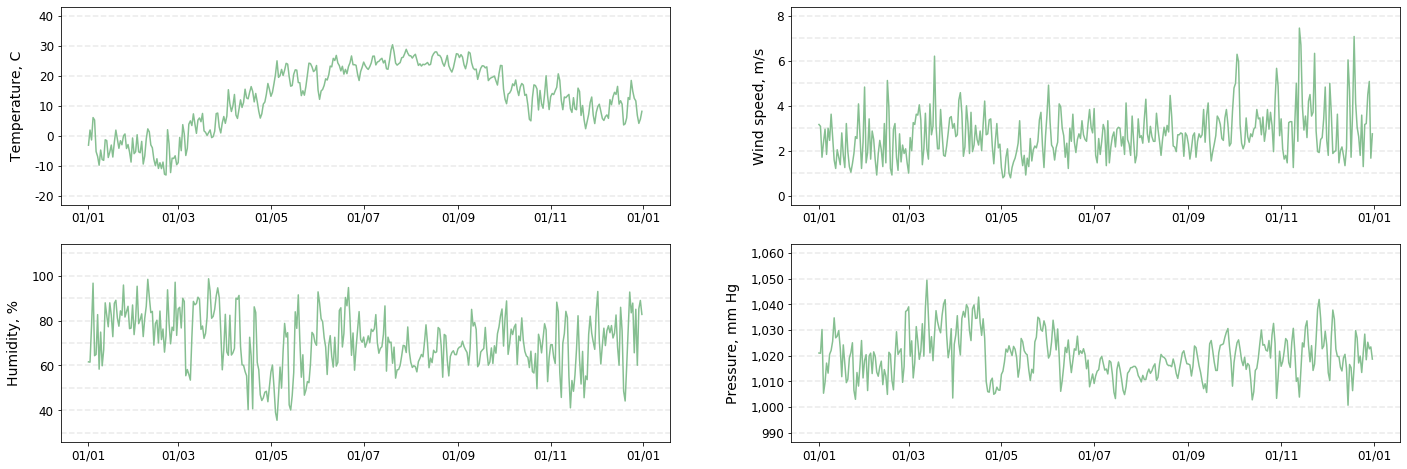

In [5]:
#plot daily statistics on number of passengers in one request
dir = RESULT_DIR + 'daily_passengers'
columns = ['day_of_year', 'passenger_count', 'trip_count']
df = read_df(dir, columns, columns[0])
df['date'] = pd.to_datetime(df['day_of_year'], format='%j')
df.set_index(['date'], inplace=True)

width = 0.9  
bottom = np.zeros(len(pd.unique(df.day_of_year)))
legend_data = [[], []]

for pcount in range(1, 7):
    filtered = df[df['passenger_count'] == pcount]
    y = np.array(filtered.trip_count)/1000
    p = plt.bar(filtered.index.values, y, width,
                     bottom=bottom)
    legend_data[0].append(p[0])
    legend_data[1].append('%s passengers' % pcount)
    bottom = bottom + y
plt.ylabel('Trip counts, $10^3$')

ax = plt.gca()
ax.set_title('Trips by number of passengers. New York 2015')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(DateFormatter("%d/%m"))
plt.legend(tuple(legend_data[0]), tuple(legend_data[1]),loc='upper right' )
plt.show()


Dataframe loaded. Shape (365, 5). Columns: Index(['date', 'Temperature, C', 'Humidity, %', 'Wind speed, m/s',
       'Pressure, mm Hg'],
      dtype='object')


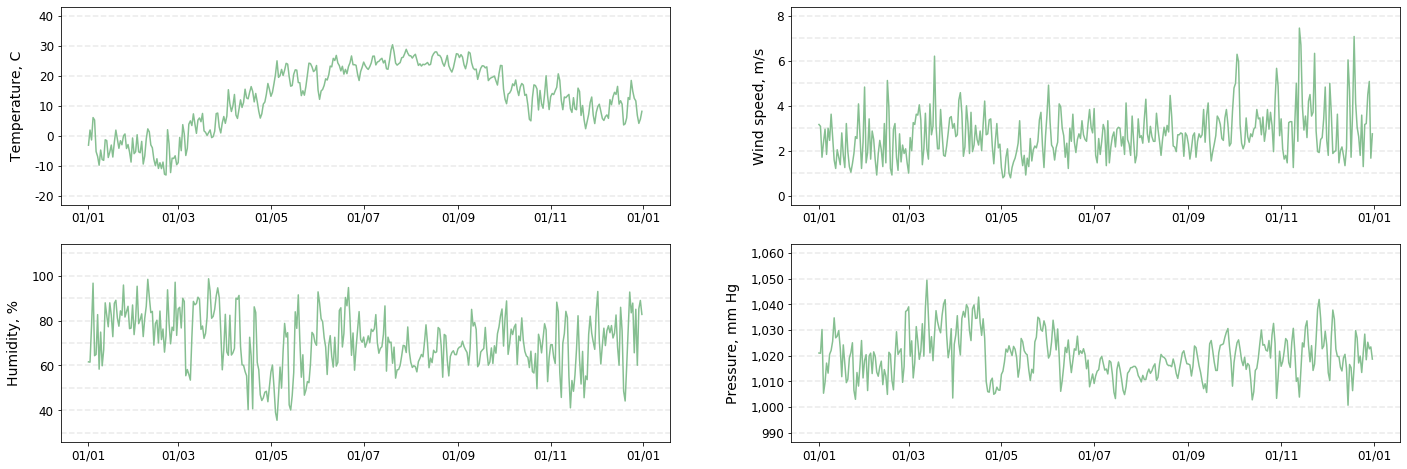

In [7]:
from bdt.nyc_hist_results import *

# histograms over all range of data
histogram_data = [distance_hist, passenger_hist, duration_hist, speed_hist]
labels = [['Distance histogram', 'Trip distance, meters', 'Count, trips '],
          ['Passenger histogram', 'Number of passengers', 'Count, trips'],
          ['Duration histogram', 'Trip duration, seconds', 'Count, trips'],
          ['Speed histogram', 'Average trip speed, m/s', 'Count, trips']]

for i in range(len(histogram_data)):
   plot_rdd_histogram(histogram_data[i], *labels[i])


Dataframe loaded. Shape (365, 5). Columns: Index(['date', 'Temperature, C', 'Humidity, %', 'Wind speed, m/s',
       'Pressure, mm Hg'],
      dtype='object')


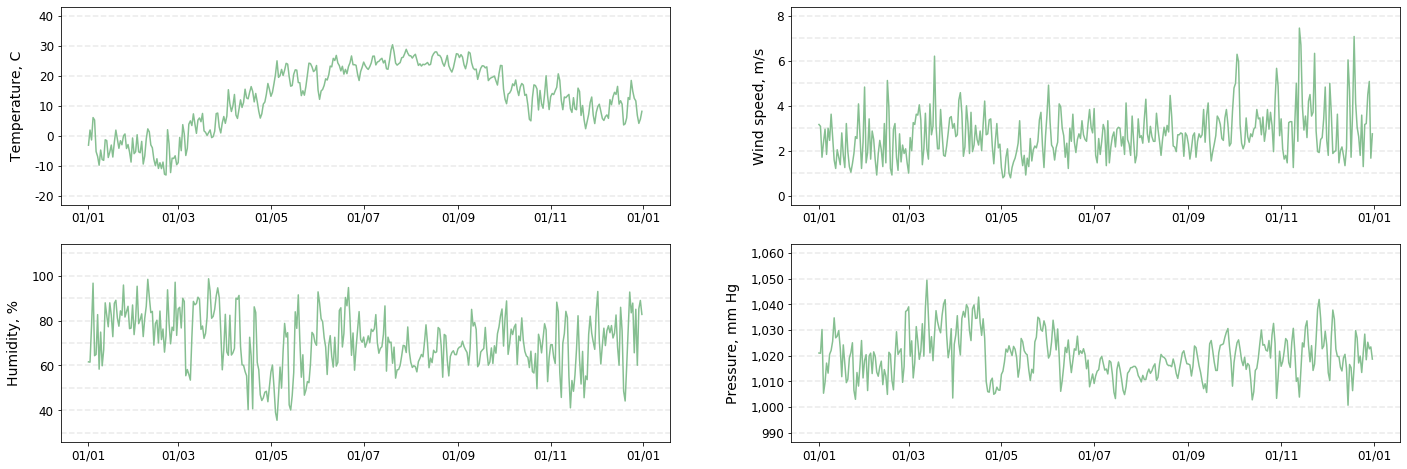

In [8]:
# first bins from previous histograms   
histogram_data2 = [distance_hist3km, duration_hist30min, speed_40hist, daily_counts_hist]
labels2 = [['Trips shorter than 3 km', 'Trip distance, meters', 'Count, trips '],
           ['Trips shorter than 30 minutes', 'Trip duration, seconds', 'Count, trips'],
           ['Speeds lower than 40 km/h', 'Average trip speed, m/s', 'Count, trips'],
           ['Daily trip counts histogram', 'Count, trips', 'Count, days']]


for i in range(len(histogram_data2)):
   plot_rdd_histogram(histogram_data2[i], *labels2[i])


Dataframe loaded. Shape (365, 5). Columns: Index(['date', 'Temperature, C', 'Humidity, %', 'Wind speed, m/s',
       'Pressure, mm Hg'],
      dtype='object')


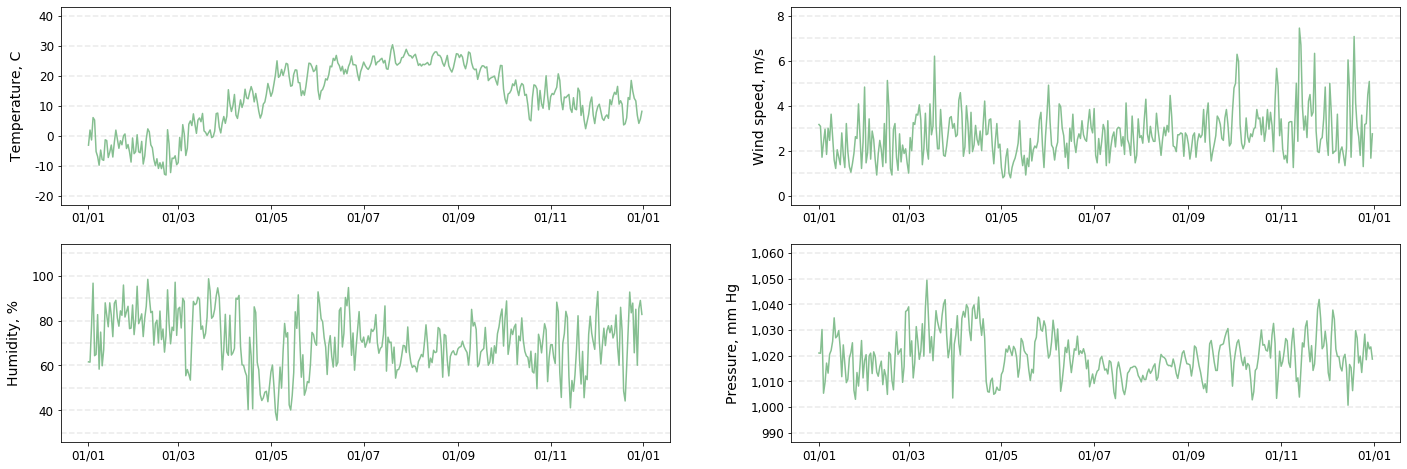

In [11]:
# weather
dir = RESULT_DIR + 'weather_daily_means'
columns =  ['date','Temperature, C', 'Humidity, %', 'Wind speed, m/s', 'Pressure, mm Hg']
weatherDF = read_df(dir, columns, 'date')
weatherDF['date'] = pd.to_datetime(weatherDF['date']).dt.date
weatherDF.set_index(['date'], inplace=True)
plot_weather(weatherDF, columns)


Dataframe loaded. Shape (365, 5). Columns: Index(['date', 'Temperature, C', 'Humidity, %', 'Wind speed, m/s',
       'Pressure, mm Hg'],
      dtype='object')


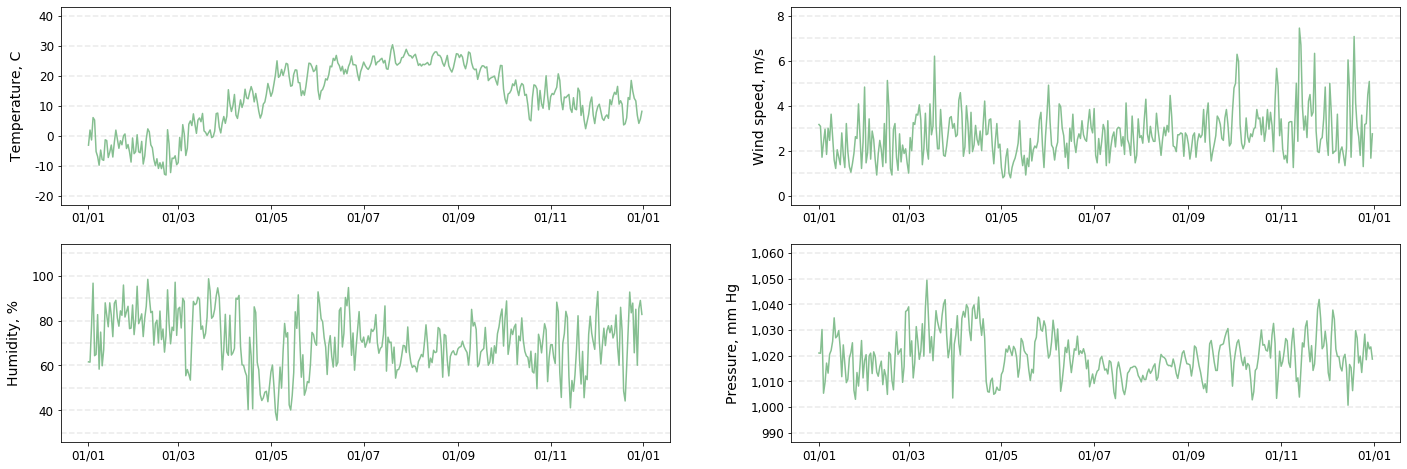

In [9]:
# average speed and number of trips
# by day of the week and time
dir3 =  RESULT_DIR + 'weekdays_stats'
columns = ['Week Day', 'Hour', 'trip_count' ,'total_duration', 'avg_speed_ms']
df3 = read_df(dir3, columns)

# otherwise pandas sorts them alphabetically
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df3['Week Day'] = df3['Week Day'].astype(cat_type)
df3.sort_values(by=['Week Day', 'Hour'], inplace=True)

df3['avg_speed_ms'] = np.round(df3['avg_speed_ms'])
plot_heatmap(df3, 'avg_speed_ms')


df3['trip_count'] = np.round(df3['trip_count'] / PIC_SCALE)
plot_heatmap(df3, 'trip_count')



Coefficients: 
 [-0.00177605]
Mean squared error: 0.00
Coefficient of determination: -0.38


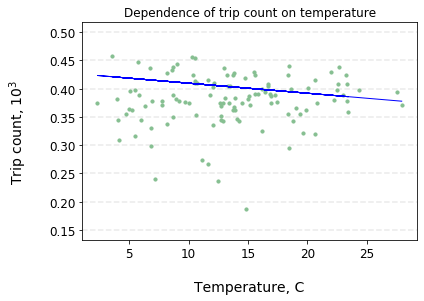

Coefficients: 
 [0.00019819]
Mean squared error: 0.00
Coefficient of determination: -0.35


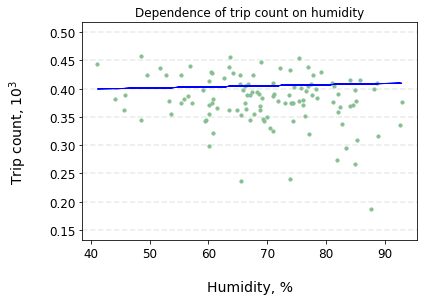

Coefficients: 
 [-0.00520873]
Mean squared error: 0.00
Coefficient of determination: -0.34


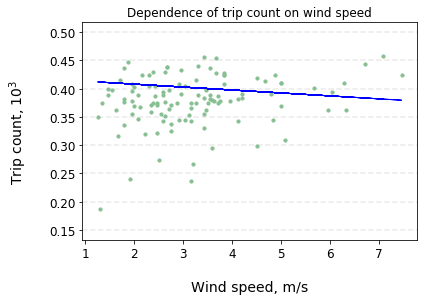

Coefficients: 
 [0.00143027]
Mean squared error: 0.00
Coefficient of determination: -0.55


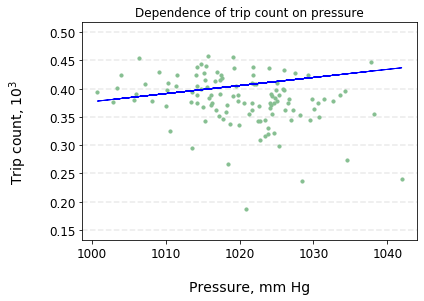

In [12]:
# does number of trips depends on weather conditions?
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

weather_columns = ['date', 'Temperature, C', 'Humidity, %', 'Wind speed, m/s', 'Pressure, mm Hg']

weatherDF['day_of_year'] = [int(format(dt, '%j')) for dt in weatherDF.index.values]
train_size = 250
# split dataframes into training and testing subsets
weather_train = weatherDF[weatherDF['day_of_year'] <= train_size]
nyc_train = nycDF[nycDF['day_of_year'] <= train_size]
weather_test = weatherDF[weatherDF['day_of_year'] > train_size]
nyc_test = nycDF[nycDF['day_of_year'] > train_size]

y_train = np.array([nyc_train['trip_count']]).reshape(len(nyc_train.index.values))
y_test = np.array([nyc_test['trip_count']]).reshape(len(nyc_test.index.values))
y_train = y_train/1000
y_test = y_test/1000

for col in weather_columns[1:]:
    x_train = np.array([weather_train[col]]).T
    x_test = np.array([weather_test[col]]).T

    # Create linear regression model
    regr = linear_model.LinearRegression(normalize=True)

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_predicted = regr.predict(x_test)

    print('Coefficients: \n', regr.coef_)
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_predicted))
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_predicted))

    # Plot outputs
    plt.scatter(x_test, y_test, color='#86bf91', s=10, zorder=2)
    plt.plot(x_test, y_predicted, color='blue', linewidth=1, zorder=3)
    ax = plt.gca()
    for tick in ax.get_yticks():
        ax.axhline(y=tick, linestyle='dashed', alpha=0.6, color='#dddddd', zorder=1)
    param = col.split(',')[0].lower()
    ax.set_title('Dependence of trip count on {}'.format(param))
    ax.set_ylabel('Trip count, $10^3$', labelpad=20)
    ax.set_xlabel(col, labelpad=20)

    plt.show()